## Convolutional Neural Network using SVM

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.5.0'

In [4]:
# Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./225,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [5]:
training_set = train_datagen.flow_from_directory('data/cotton-disease-dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./225)
test_set = test_datagen.flow_from_directory('data/cotton-disease-dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [6]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [7]:
from tensorflow.keras.regularizers import l2

In [8]:
# Building the CNN
# Initializing the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(tf.keras.layers.Dropout(0.5))
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.1))

cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.25))


# Step 5 - Output Layer

# For binary classification
# cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='linear'))
cnn.add(tf.keras.layers.Dense(units=4, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax'))

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         2

In [11]:
# Training the CNN

# Compiling the CNN
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r = cnn.fit(x = training_set, validation_data = test_set, epochs=15)

Epoch 1/15
61/61 [==============================] - 36s 584ms/step - loss: 1.1154 - accuracy: 0.5315 - val_loss: 0.9125 - val_accuracy: 0.6792
Epoch 2/15
61/61 [==============================] - 25s 402ms/step - loss: 0.7816 - accuracy: 0.7104 - val_loss: 0.8252 - val_accuracy: 0.6415
Epoch 3/15
61/61 [==============================] - 24s 399ms/step - loss: 0.7675 - accuracy: 0.7037 - val_loss: 0.6520 - val_accuracy: 0.7264
Epoch 4/15
61/61 [==============================] - 25s 402ms/step - loss: 0.6646 - accuracy: 0.7432 - val_loss: 0.8508 - val_accuracy: 0.6981
Epoch 5/15
61/61 [==============================] - 25s 409ms/step - loss: 0.5811 - accuracy: 0.7745 - val_loss: 0.6502 - val_accuracy: 0.6792
Epoch 6/15
61/61 [==============================] - 25s 406ms/step - loss: 0.5066 - accuracy: 0.8134 - val_loss: 0.6261 - val_accuracy: 0.7264
Epoch 7/15
61/61 [==============================] - 28s 454ms/step - loss: 0.4445 - accuracy: 0.8329 - val_loss: 0.5101 - val_accuracy: 0.8019

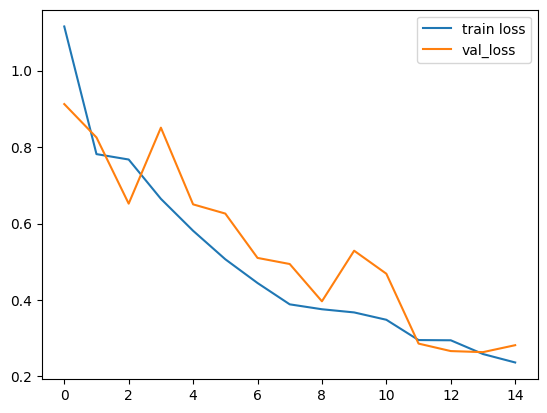

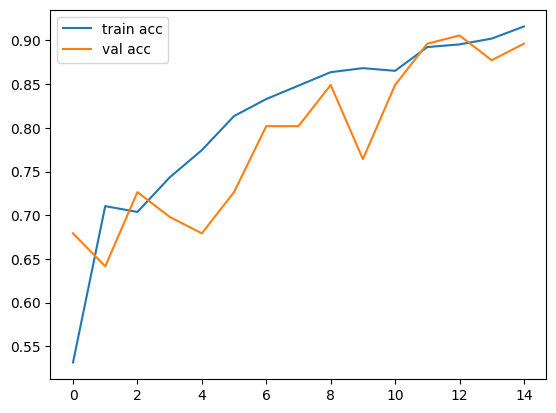

In [12]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [13]:
# save it as a h5 file

from tensorflow.keras.models import  load_model

cnn.save('model_cotton_disease.h5')

In [14]:
from tensorflow.keras.models import load_model

# load model
model = load_model('model_cotton_disease.h5')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         2

In [17]:
# Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('data/cotton-disease-dataset/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)   

In [18]:
result

array([[0.9524521 , 0.00757923, 0.0344086 , 0.00555994]], dtype=float32)

In [25]:
if result[0] < 0:
    print("The image classified is disease")
else:
    print("The image classified is not disease")

The image classified is not disease
